In [53]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scqubits


## Résolution scqubit

In [54]:
def get_eigen_sc(EJ=30.02, EC=1.2, ng=0.3, n_cut=31, N_eigen=3):
    transmon = scqubits.Transmon(EJ, EC, ng, n_cut)
    H = transmon.hamiltonian()
    vals, vecs = transmon.eigensys()
    vals = vals - vals[0]
    return vals[1:N_eigen+1]

## Résolution qubits

On commence par coder le Hamiltonien dans la base de charge. Les états seront tronqués de |-N> à |+N> qui est en paramètre de l'hamiltonien. 

$$H = 4E_C (\hat{n}-n_g)^2 - E_J \cos(\phi)$$

In [55]:
def Hamiltonian_qutip(EJ=30.02, EC=1.2, ng=0.3, n_cut=31, N_eigen=3):
    dim = 2 * n_cut + 1

    n_list = np.arange(-n_cut, n_cut + 1)
    n_op = qt.Qobj(np.diag(n_list))

    op_couple = qt.tunneling(dim, 1)

    H = 4 * EC * (n_op - ng) ** 2 - 0.5 * EJ * op_couple

    return H

In [56]:
def get_eigen_qubits(EJ=30.02, EC=1.2, ng=0.3, n_cut=31, N_eigen=3):
    H = Hamiltonian_qutip(EJ, EC, ng, n_cut, N_eigen)
    energies = H.eigenenergies()
    energies = energies - energies[0]
    return energies[1 : N_eigen + 1]

## Résolution numpy

In [57]:
def Hamiltonian_numpy(EJ=30.02, EC=1.2, ng=0.3, n_cut=31, N_eigen=3):
    diag = [4 * EC * (i - ng) ** 2 for i in range(-n_cut, n_cut + 1)]
    diag_off = [-EJ / 2 for i in range(-n_cut, n_cut)]
    diag_on = [-EJ / 2 for i in range(-n_cut, n_cut)]
    H = np.diag(diag, k=0) + np.diag(diag_on, k=1) + np.diag(diag_off, k=-1)
    return H

In [58]:
def get_eigen_numpy(EJ=30.02, EC=1.2, ng=0.3, n_cut=31, N_eigen=3):
    H = Hamiltonian_numpy(EJ, EC, ng, n_cut, N_eigen)

    eigen_values_H = np.linalg.eigvalsh(H)

    energies = eigen_values_H - eigen_values_H[0]
    return energies[1 : N_eigen + 1]

## Plot des résultats

In [ ]:
def plot_transmon(ng_max, N_eigen=3, n_cut=31,EC = 1.02):
    NG = np.linspace(-ng_max, ng_max, 100)
    Res = np.zeros((N_eigen, 3, 100))
    i = 0
    for ng in NG:
        E_sc = get_eigen_sc(ng=ng, N_eigen=N_eigen, n_cut=n_cut,EC = EC)
        E_qu = get_eigen_qubits(ng=ng, N_eigen=N_eigen, n_cut=n_cut, EC= EC)
        E_np = get_eigen_numpy(ng=ng, N_eigen=N_eigen, n_cut=n_cut,EC= EC)
        Res[:, :, i] = np.array([E_sc, E_qu, E_np]).T
        i += 1
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 5))
    for i in range(N_eigen):
        ax1.plot(NG, Res[i][0][:], label=f"Niveau {i}")
        ax2.plot(NG, Res[i][1][:], label=f"Niveau {i}")
        ax3.plot(NG, Res[i][2][:], label=f"Niveau {i}")
    ax1.set(
        xlabel=r"$n_g$",
        ylabel=r"$E^{(n)}-E^{(0)}$ [GHz]",
        title="Résolution avec scqubits",
    )
    ax2.set(
        xlabel=r"$n_g$",
        ylabel=r"$E^{(n)}-E^{(0)}$ [GHz]",
        title="Résolution avec qubits",
    )
    ax3.set(
        xlabel=r"$n_g$",
        ylabel=r"$E^{(n)}-E^{(0)}$ [GHz]",
        title="Résolution avec numpy",
    )
    legend_title = f"Ratio $E_J/E_C = {30/EC:.1f}$"
    
    ax3.legend(
        bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        title=legend_title,
        title_fontsize='12'
    )
    plt.tight_layout()
    plt.show()

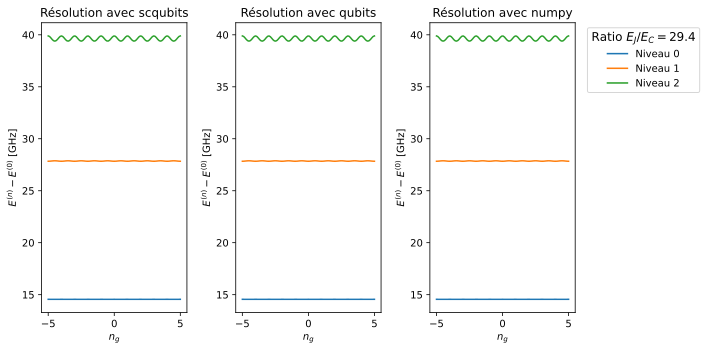

In [62]:
plot_transmon(5,EC = 1.02)

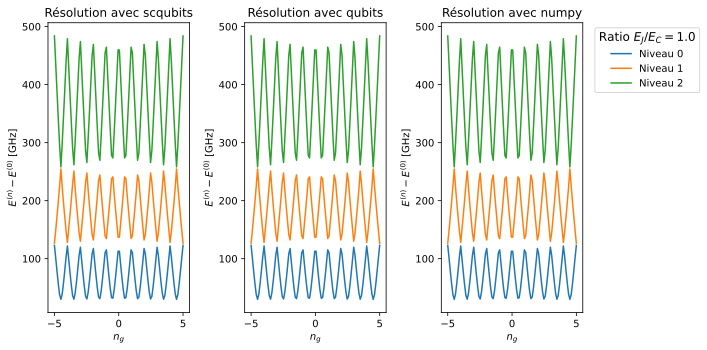

In [63]:
plot_transmon(5,EC = 30)